## Kaggle Competition
### House Prices: Advanced Regression Techniques

In [1]:
# Import the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

In [4]:
# Read the Dataset

df = pd.read_csv('train.csv')     # Read the Training Dataset
test_df = pd.read_csv('test.csv')  # Read the Test Dataset

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We have 81 Features (Columns) and 1460 Records (Rows) in our Dataset

In [6]:
df.shape

(1460, 81)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Generate a Heatmap to check for Features which have Null values

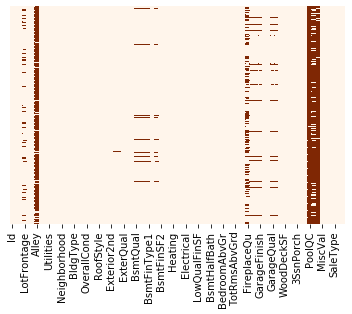

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Oranges')

In [10]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

We see that a lot of Features have Null values

We are going to fill up missing values with Mode (maximum number of occurences) for Categorical Features and Mean (Average) for Numerical Features

In [11]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [12]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

We are going to drop the Features : 'Alley' , 'PoolQC', 'Fence' and 'MiscFeature' as they have more than 80% Null values.
We will also drop 'Id' Column as it has unique values

In [13]:
df.drop(['Alley','PoolQC','Fence','MiscFeature','Id'], axis=1, inplace=True)

We are now going to fill the missing values of the following Categorical Features with the Mode (i.e. maximum number of occurences). Using a For Loop to iterate through the list.
#### 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish' , 'GarageQual', 'GarageCond'

In [14]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [15]:
missing_cat_columns = ['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish' , 'GarageQual', 'GarageCond']

In [16]:
df['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [17]:
for col in missing_cat_columns:
    df[col] = df[col].fillna(df[col].mode()[0])


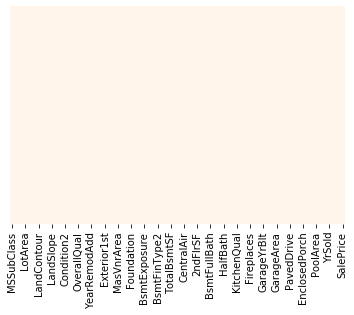

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Oranges')

In [61]:
df.shape

(1460, 76)

In [62]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

From the Heatmap, we have addressed missing values for all Features in our Training Dataset

Now, lets handle the Categorical Features. We have 39 Categorical Features to deal with in our Dataset

In [19]:
all_cat_columns = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition2','BldgType','Condition1','HouseStyle','SaleType','SaleCondition',
                   'ExterCond','ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating',
                   'HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [20]:
df_1 = pd.get_dummies(data=df, columns=all_cat_columns)

In [21]:
df_1.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,1,0,0,0,0,1,0,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,1,0,0,0,0,1,0,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,1,0,0,0,0,1,0,0,1
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,1,0,0,0,0,1,0,0,1
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,1,0,0,0,0,1,0,0,1


In [26]:
df_1.shape

(1460, 276)

In [44]:
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())

In [45]:
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].mean())

In [46]:
test_df.drop(['Alley','PoolQC','Fence','MiscFeature','Id'], axis=1, inplace=True)

In [47]:
for col in missing_cat_columns:
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

In [63]:
test_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [77]:
all_columns = list(test_df.columns)

In [97]:
test_df.shape

(1459, 75)

In [91]:
for feature in all_columns:
    if len(df[feature].value_counts().index) != len(test_df[feature].value_counts().index) :
        print('Subcategories of {} does not match'.format(feature))
        print(df[feature].value_counts().index)
        print(test_df[feature].value_counts().index)
        print('*'*100)
    else :
        print('Subcategories of {} matches'.format(feature))
        print('-'*100)


Subcategories of MSSubClass does not match
Int64Index([20, 60, 50, 120, 30, 160, 70, 80, 90, 190, 85, 75, 45, 180, 40], dtype='int64')
Int64Index([20, 60, 50, 120, 30, 70, 160, 80, 90, 190, 85, 180, 75, 45, 40,
            150],
           dtype='int64')
****************************************************************************************************
Subcategories of MSZoning matches
----------------------------------------------------------------------------------------------------
Subcategories of LotFrontage does not match
Float64Index([70.04995836802665,              60.0,              70.0,
                           80.0,              50.0,              75.0,
                           65.0,              85.0,              78.0,
                           90.0,
              ...
                          160.0,             168.0,             128.0,
                          144.0,              39.0,             106.0,
                           38.0,             140.0,        

Subcategories of BsmtFinType2 matches
----------------------------------------------------------------------------------------------------
Subcategories of BsmtFinSF2 does not match
Int64Index([   0,  180,  374,  551,   93,  468,  147,  480,  539,  712,
            ...
             495,  499,  500,  506,  531,  532,  544,  546,  547, 1474],
           dtype='int64', length=144)
Float64Index([  0.0, 162.0, 294.0, 483.0, 144.0, 590.0, 596.0, 288.0, 435.0,
              247.0,
              ...
              138.0, 748.0, 404.0, 206.0, 278.0, 121.0, 308.0, 167.0, 186.0,
              750.0],
             dtype='float64', length=162)
****************************************************************************************************
Subcategories of BsmtUnfSF does not match
Int64Index([   0,  728,  384,  572,  600,  300,  440,  625,  280,  672,
            ...
             740,  735,  724,  734,  733,  731,  730,  726,  725, 2046],
           dtype='int64', length=780)
Float64Index([   0.0

Subcategories of OpenPorchSF does not match
Int64Index([  0,  36,  48,  20,  40,  45,  30,  24,  60,  39,
            ...
            182, 180, 176, 175, 174, 159, 156, 148, 142, 119],
           dtype='int64', length=202)
Int64Index([  0,  48,  32,  40,  36,  28,  24,  50,  64,  30,
            ...
            197, 194, 193, 191, 190, 188, 184, 183, 178, 742],
           dtype='int64', length=203)
****************************************************************************************************
Subcategories of EnclosedPorch does not match
Int64Index([  0, 112,  96, 120, 144, 192, 216, 252, 116, 156,
            ...
            291, 162, 169, 170, 172, 174, 177, 183, 189, 552],
           dtype='int64', length=120)
Int64Index([  0,  96, 168, 112,  84, 144, 192,  60, 180, 160,
            ...
            165, 167, 170, 175, 183, 190, 196, 200, 203, 138],
           dtype='int64', length=131)
*********************************************************************************************

In [69]:
df['SaleType'].value_counts().index

Index(['WD', 'New', 'COD', 'ConLD', 'ConLw', 'ConLI', 'CWD', 'Oth', 'Con'], dtype='object')

In [73]:
len(df['SaleType'].value_counts().index) == len(test_df['SaleType'].value_counts().index)

True

In [55]:
test_df['Utilities']=test_df['Utilities'].fillna(test_df['Utilities'].mode()[0])
test_df['Exterior1st']=test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])
test_df['Exterior2nd']=test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])
test_df['BsmtFinType1']=test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
test_df['BsmtFinSF1']=test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean())
test_df['BsmtFinSF2']=test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mean())
test_df['BsmtUnfSF']=test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean())
test_df['TotalBsmtSF']=test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean())
test_df['BsmtFullBath']=test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mode()[0])
test_df['BsmtHalfBath']=test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mode()[0])
test_df['KitchenQual']=test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0])
test_df['Functional']=test_df['Functional'].fillna(test_df['Functional'].mode()[0])
test_df['GarageCars']=test_df['GarageCars'].fillna(test_df['GarageCars'].mean())
test_df['GarageArea']=test_df['GarageArea'].fillna(test_df['GarageArea'].mean())
test_df['SaleType']=test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])
test_df['MSZoning']=test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0])

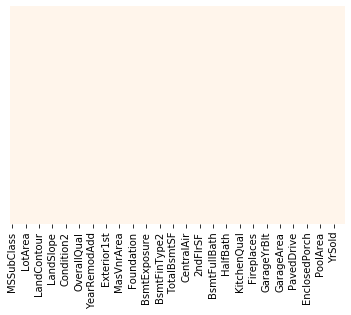

In [56]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='Oranges')

In [57]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-null object
MasVnrType       1459 no

In [93]:
combined_df = pd.concat([df,test_df],axis=0)

In [105]:
df.shape

(1460, 76)

In [111]:
test_df.shape

(1459, 75)

In [98]:
combined_df_1 = pd.get_dummies(data=combined_df)

In [102]:
combined_df_1.shape

(2919, 276)

In [101]:
combined_df_1 = combined_df_1.loc[:,~combined_df_1.columns.duplicated()]

In [106]:
df_train = combined_df_1.iloc[:1460,:]

In [107]:
df_test = combined_df_1.iloc[1460:,:]

In [112]:
df_test.drop(['SalePrice'],axis=1,inplace=True)

In [113]:
X_train = df_train.drop(['SalePrice'],axis=1)

In [114]:
y_train = df_train['SalePrice']

Let's apply XG Boost Regressor technique to create our Model

In [115]:
import xgboost

In [116]:
xgb_regressor = xgboost.XGBRegressor()

Lets apply Hyperparameter Optimization to find the best parameters for our ML model using RandomizedCV

In [117]:
from sklearn.model_selection import RandomizedSearchCV

In [118]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
learning_rate = [0.05,0.1,0.15,0.20]
min_child_weight = [1,2,3,4]
booster = ['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

Define the grid of parameters to search

In [119]:
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'min_child_weight': min_child_weight,
    'booster': booster,
    'base_score': base_score
    }

In [120]:
xgb_random_cv = RandomizedSearchCV(estimator=xgb_regressor, param_distributions=hyperparameter_grid, n_iter=50, 
                                    scoring='neg_mean_absolute_error', n_jobs=4, verbose=5, return_train_score=True,
                                   random_state=42)

In [121]:
xgb_random_cv.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   47.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  4.6min
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:  9.1min finished


[17:24:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          rand...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree',

In [122]:
xgb_random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [123]:
xgb_regressor = xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [124]:
xgb_regressor.fit(X_train,y_train)

[17:28:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [126]:
y_pred = xgb_regressor.predict(df_test)

In [129]:
y_pred

array([119378.17 , 164219.4  , 189135.83 , ..., 157451.73 , 122166.984,
       228951.72 ], dtype=float32)

In [130]:
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('sample_sub.csv')
kaggle_df = pd.concat([sub_df['Id'],pred],axis=1)
kaggle_df.columns = ['Id','SalePrice']
kaggle_df.to_csv('sample_submission.csv',index=False)